Tutorial taken from:
https://www.pluralsight.com/guides/scikit-machine-learning

# Problem Statement

The aim of this guide is to build a classification model to detect diabetes. 

We will be using the diabetes dataset which contains 768 observations and 9 variables:

* pregnancies - Number of times pregnant.
* glucose - Plasma glucose concentration.
* diastolic - Diastolic blood pressure (mm Hg).
* triceps - Skinfold thickness (mm).
* insulin - Hour serum insulin (mu U/ml).
* bmi – Basal metabolic rate (weight in kg/height in m).
* dpf - Diabetes pedigree function.
* age - Age in years.

Target variable: outcome - “1” represents the presence of diabetes while “0” represents the absence of it.

# Evaluation Metric

We will evaluate the performance of the model using accuracy, which represents the percentage of cases correctly classified.

Mathematically, for a binary classifier, it's represented as accuracy = (TP+TN)/(TP+TN+FP+FN), where:

* True Positive (TP) are cases with positive labels which have been correctly classified as positive.
* True Negative (TN) are cases with negative labels which have been correctly classified as negative.
* False Positive (FP) are cases with negative labels which have been incorrectly classified as positive.
* False Negative (FN) are cases with positive labels which have been incorrectly classified as negative.

# Steps



1. Loading the required libraries and modules.
2. Reading the data and performing basic data checks.
3. Creating arrays for the features and the response variable.
4. Creating the training and test datasets.
5. Building , predicting, and evaluating the neural network model.

In [1]:
# Step 1 - Loading the Required Libraries and Modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
# %% Step 2 - Reading the Data and Performing Basic Data Checks
df = pd.read_csv('diabetes.csv') 
print(df.shape)
#df.describe()
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#%% Step 3 - Creating Arrays for the Features and the Response Variable
target_column = ['Outcome'] 
predictors = list(set(list(df.columns))-set(target_column))
print(predictors)

#Sets are used to store multiple items in a single variable.
#Set is one of 4 built-in data types in Python used to store collections of data, 
#the other 3 are List, Tuple, and Dictionary, all with different qualities and usage.
#A set is a collection which is both unordered and unindexed.

#The variables are normalized
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

['BloodPressure', 'DiabetesPedigreeFunction', 'Pregnancies', 'BMI', 'Age', 'SkinThickness', 'Insulin', 'Glucose']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.194990,0.410381,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.136913,0.145188,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032231,0.259259,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.100723,0.296296,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.153926,0.358025,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.258781,0.506173,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#%% Step 4 - Creating the Training and Test Datasets
X = df[predictors].values
y = df[target_column].values

#the same seed is used to partition to obtain the same results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
y_test = np.squeeze(y_test)
y_train = np.squeeze(y_train)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)
X,y

(537, 8)
(537,)
(231, 8)
(231,)


(array([[0.59016393, 0.25909091, 0.35294118, ..., 0.35353535, 0.        ,
         0.74371859],
        [0.54098361, 0.14504132, 0.05882353, ..., 0.29292929, 0.        ,
         0.42713568],
        [0.52459016, 0.27768595, 0.47058824, ..., 0.        , 0.        ,
         0.91959799],
        ...,
        [0.59016393, 0.10123967, 0.29411765, ..., 0.23232323, 0.13238771,
         0.6080402 ],
        [0.49180328, 0.14421488, 0.05882353, ..., 0.        , 0.        ,
         0.63316583],
        [0.57377049, 0.13016529, 0.05882353, ..., 0.31313131, 0.        ,
         0.46733668]]),
 array([[1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
      

In [8]:
#Three hidden layer each layer with eigth neurons
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500) 
print(mlp)

MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=500)


In [16]:
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
predict_test[:10],predict_train[:10]

(array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64),
 array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64))

In [17]:
#%% Results
print(confusion_matrix(y_train,predict_train))

[[324  34]
 [ 76 103]]


In [18]:
target_names = ['absence', 'diabetes']
print(classification_report(y_train,predict_train,target_names=target_names))

              precision    recall  f1-score   support

     absence       0.81      0.91      0.85       358
    diabetes       0.75      0.58      0.65       179

    accuracy                           0.80       537
   macro avg       0.78      0.74      0.75       537
weighted avg       0.79      0.80      0.79       537



In [19]:
print(confusion_matrix(y_test,predict_test))

[[125  17]
 [ 41  48]]


In [20]:
print(classification_report(y_test,predict_test,target_names=target_names))

              precision    recall  f1-score   support

     absence       0.75      0.88      0.81       142
    diabetes       0.74      0.54      0.62        89

    accuracy                           0.75       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.75      0.75      0.74       231



In [21]:
from itertools import product
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig=plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[324  34]
 [ 76 103]]


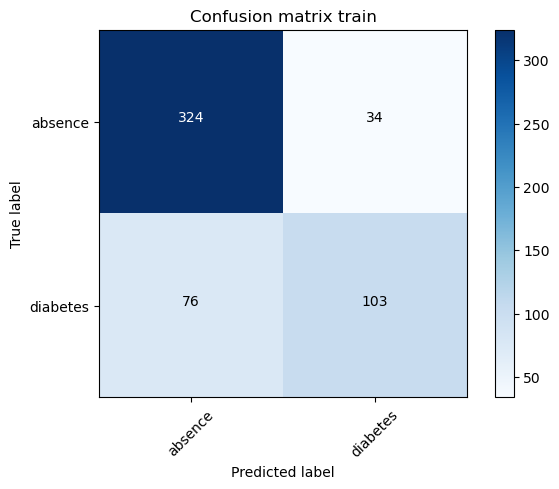

In [22]:
mc_train = confusion_matrix(y_train,predict_train)
plot_confusion_matrix(mc_train, classes=target_names,
                      title='Confusion matrix train')

Confusion matrix, without normalization
[[125  17]
 [ 41  48]]


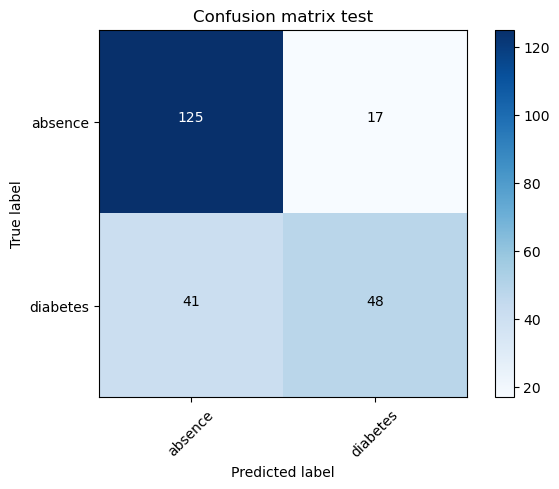

In [23]:
mc_test = confusion_matrix(y_test,predict_test)
plot_confusion_matrix(mc_test, classes=target_names,
                      title='Confusion matrix test')

# Increasing the number of hidden neurons

In [24]:
#Four hidden layer each layer with eigth neurons
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8,8), activation='relu', solver='adam', max_iter=1000) 
print(mlp)

MLPClassifier(hidden_layer_sizes=(8, 8, 8, 8), max_iter=1000)


In [25]:
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [26]:
#%% Results
print(confusion_matrix(y_train,predict_train))

[[318  40]
 [ 75 104]]


In [27]:
target_names = ['absence', 'diabetes']
print(classification_report(y_train,predict_train,target_names=target_names))

              precision    recall  f1-score   support

     absence       0.81      0.89      0.85       358
    diabetes       0.72      0.58      0.64       179

    accuracy                           0.79       537
   macro avg       0.77      0.73      0.75       537
weighted avg       0.78      0.79      0.78       537



In [28]:
print(confusion_matrix(y_test,predict_test))

[[123  19]
 [ 38  51]]


In [29]:
print(classification_report(y_test,predict_test,target_names=target_names))

              precision    recall  f1-score   support

     absence       0.76      0.87      0.81       142
    diabetes       0.73      0.57      0.64        89

    accuracy                           0.75       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.75      0.75      0.75       231



In [30]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,6), activation='relu', solver='adam', max_iter=1000) 

mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

target_names = ['absence', 'diabetes']
print(classification_report(y_train,predict_train,target_names=target_names))

print(classification_report(y_test,predict_test,target_names=target_names))

              precision    recall  f1-score   support

     absence       0.83      0.89      0.86       358
    diabetes       0.74      0.63      0.68       179

    accuracy                           0.80       537
   macro avg       0.78      0.76      0.77       537
weighted avg       0.80      0.80      0.80       537

              precision    recall  f1-score   support

     absence       0.77      0.86      0.81       142
    diabetes       0.72      0.58      0.65        89

    accuracy                           0.75       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.75      0.75      0.75       231



In [31]:
mlp = MLPClassifier(activation='relu', solver='adam', max_iter=1000)
print(mlp) 

mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

target_names = ['absence', 'diabetes']
print(classification_report(y_train,predict_train,target_names=target_names))

print(classification_report(y_test,predict_test,target_names=target_names))

MLPClassifier(max_iter=1000)
              precision    recall  f1-score   support

     absence       0.83      0.91      0.86       358
    diabetes       0.77      0.62      0.69       179

    accuracy                           0.81       537
   macro avg       0.80      0.76      0.77       537
weighted avg       0.81      0.81      0.80       537

              precision    recall  f1-score   support

     absence       0.76      0.87      0.81       142
    diabetes       0.72      0.56      0.63        89

    accuracy                           0.75       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.75      0.74       231



c:\Users\Esteban\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
fold_runs = 0
final_score = 0
for train, test in kf.split(X):
  mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=1000)
  #print("%s %s" % (train, test))
  print(np.ravel(y[train]).shape)
  fold_runs = fold_runs + 1;
  mlp.fit(X[train], np.ravel(y[train]))
  outVal = mlp.score(X[test], np.ravel(y[test]))    
  #Compute classification error
  final_score = final_score + outVal;

#The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop.
print('Score: ' + str(final_score/fold_runs) + ' after ' + str(fold_runs) + ' runs');

(691,)
(691,)
(691,)
(691,)
(691,)
(691,)
(691,)
(691,)
(692,)
(692,)
Score: 0.7733937115516063 after 10 runs


# Using other algorithm

In [33]:
from sklearn import svm

clf = svm.NuSVC(gamma='auto')
clf.fit(X_train,y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

target_names = ['absence', 'diabetes']
print(classification_report(y_train,predict_train,target_names=target_names))

print(classification_report(y_test,predict_test,target_names=target_names))

              precision    recall  f1-score   support

     absence       0.81      0.92      0.86       358
    diabetes       0.79      0.55      0.65       179

    accuracy                           0.80       537
   macro avg       0.80      0.74      0.76       537
weighted avg       0.80      0.80      0.79       537

              precision    recall  f1-score   support

     absence       0.75      0.91      0.82       142
    diabetes       0.78      0.53      0.63        89

    accuracy                           0.76       231
   macro avg       0.77      0.72      0.73       231
weighted avg       0.77      0.76      0.75       231

